<center><b>Análisis Explatorio de Datos (EDA)<b><center>

GUID: BANDA-ANCHA-Y-BANDA-ANGOS

Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [12]:
import pandas as pd
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt
import unidecode
import pdb

In [13]:
guid = 'BANDA-ANCHA-Y-BANDA-ANGOS'
df = pd.read_parquet('..\\datasets\\Fuente\\'+guid+'.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               49 non-null     object
 1   Trimestre         49 non-null     object
 2   Provincia         49 non-null     object
 3   Banda ancha fija  49 non-null     object
 4   Dial up           49 non-null     object
 5   Total             49 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6,5
1,2022,4,Capital Federal,2,2,2
2,2022,4,Catamarca,71,1,71
3,2022,4,Chaco,144,5,144
4,2022,4,Chubut,168,904,169


<b>Normalización</b>

Se convierte a numeros las columnas cuantitativas. Se realiza una revisión preliminar de los datos y se eliminan duplicados que se puedan presentar.

In [14]:
#df['Año'] = pd.to_numeric(df['Año'])
df['Año'] = df['Año'].astype(int)
df['Trimestre'] = df['Trimestre'].astype(int)
df['Banda ancha fija'] = df['Banda ancha fija'].astype(int)
df['Dial up'] = df['Dial up'].astype(int)
df['Total'] = df['Total'].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               49 non-null     int32 
 1   Trimestre         49 non-null     int32 
 2   Provincia         49 non-null     object
 3   Banda ancha fija  49 non-null     int32 
 4   Dial up           49 non-null     int32 
 5   Total             49 non-null     int32 
dtypes: int32(5), object(1)
memory usage: 1.5+ KB


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6,5
1,2022,4,Capital Federal,2,2,2
2,2022,4,Catamarca,71,1,71
3,2022,4,Chaco,144,5,144
4,2022,4,Chubut,168,904,169


Inspección de si la columna 'Total' es igual a la columna 'Banda ancha fija'. Se ubican solo 6 diferencias:

In [15]:
df[df['Banda ancha fija'] != df['Total']]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
4,2022,4,Chubut,168,904,169
12,2022,4,Mendoza,291,777,292
28,2022,3,Chubut,165,904,166
36,2022,3,Mendoza,289,777,290
39,2022,3,Río Negro,160,548,161
43,2022,3,Santa Cruz,49,198,50


De acuerdo a https://www.adslzone.net/esenciales/preguntas/que-es-banda-ancha/ , uno de los tipos de banda estrecha o angosta es dial up. Por lo cual la columna 'Total' debería ser la suma de 'Banda ancha fija' y 'Dial up'

In [16]:
df['Total'] = df['Banda ancha fija'] + df['Dial up']
df.drop_duplicates(inplace=True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               49 non-null     int32 
 1   Trimestre         49 non-null     int32 
 2   Provincia         49 non-null     object
 3   Banda ancha fija  49 non-null     int32 
 4   Dial up           49 non-null     int32 
 5   Total             49 non-null     int32 
dtypes: int32(5), object(1)
memory usage: 1.5+ KB


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6,11
1,2022,4,Capital Federal,2,2,4
2,2022,4,Catamarca,71,1,72
3,2022,4,Chaco,144,5,149
4,2022,4,Chubut,168,904,1072


In [17]:
fechas = []
lista_fechas = []
provincias = []
band_ancha_fija = []
dial_up = []
total = []

for index, trimester in enumerate(df['Trimestre']):
#for index, trimester in enumerate(df['Trimestre']):
     # Creando un rango de fechas
     res = calendar.monthrange(df['Año'][index], month = trimester*3)
     inicio = datetime(year = df['Año'][index],month = trimester*3-2,day=1)
     fin = datetime(year = df['Año'][index],month = trimester*3,day=res[1])

     # Replicando la data para cada fecha
     nro_veces = (fin - inicio).days + 1
     lista_fechas.extend([inicio + timedelta(days=d) for d in range(nro_veces)])
     provincias.extend([df['Provincia'][index]] * nro_veces)
     band_ancha_fija.extend([df['Banda ancha fija'][index]] * nro_veces)
     dial_up.extend([df['Dial up'][index]] * nro_veces)
     total.extend([df['Total'][index]] * nro_veces)
     #pdb.set_trace()

df_evolucion = pd.DataFrame(provincias, columns= ['Provincia'])
df_evolucion['Fecha'] = lista_fechas
df_evolucion['Banda ancha fija'] = band_ancha_fija
df_evolucion['Dial up'] = dial_up
df_evolucion['Total'] = total
#,lista_fechas,band_ancha_fija,total]
# df_evolucion['Fin_periodo'] = fechas_final
df_evolucion.info()
df_evolucion.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         4507 non-null   object        
 1   Fecha             4507 non-null   datetime64[ns]
 2   Banda ancha fija  4507 non-null   int32         
 3   Dial up           4507 non-null   int32         
 4   Total             4507 non-null   int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 123.4+ KB


,Provincia,Fecha,Banda ancha fija,Dial up,Total
0,Buenos Aires,2022-10-01,5,6,11
1,Buenos Aires,2022-10-02,5,6,11
2,Buenos Aires,2022-10-03,5,6,11
3,Buenos Aires,2022-10-04,5,6,11
4,Buenos Aires,2022-10-05,5,6,11


In [18]:
df_acumulado = df_evolucion.copy()
df_acumulado['Total_2'] = df_evolucion.groupby(['Fecha'])['Total'].transform('sum')

#df_PlayTimeGenre_acum['Horas_Acum'] = df_PlayTimeGenre_acum.groupby(['genres'])['Sum_playtime_forever'].transform('sum')
df_acumulado.head(500)
# plt.figure(figsize=(10,9))
# plt.scatter(data=df_evolucion[1:130], x='Fecha', y='Total')
# plt.title('Evolución Cantidad de Conexiones',loc='center')
# plt.xlabel('Conexiones Totales')
# plt.ylabel('Fecha')
# plt.grid()
# plt.show()

,Provincia,Fecha,Banda ancha fija,Dial up,Total,Total_2
0,Buenos Aires,2022-10-01,5,6,11,7926
1,Buenos Aires,2022-10-02,5,6,11,7926
2,Buenos Aires,2022-10-03,5,6,11,7926
3,Buenos Aires,2022-10-04,5,6,11,7926
4,Buenos Aires,2022-10-05,5,6,11,7926
...,...,...,...,...,...,...
495,Córdoba,2022-11-05,1,68,69,7926
496,Córdoba,2022-11-06,1,68,69,7926
497,Córdoba,2022-11-07,1,68,69,7926
498,Córdoba,2022-11-08,1,68,69,7926


Para analizar en un mapa, se une con otra tabla que contiene latitud y longitud de por provincia.

In [19]:
guid_prov = 'Provincias'
provincias = pd.read_parquet('..\\datasets\\Fuente\\'+guid_prov+'.parquet')
provincias.info()
provincias.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nombre    24 non-null     object 
 1   id        24 non-null     object 
 2   latitud   24 non-null     float64
 3   longitud  24 non-null     float64
dtypes: float64(2), object(2)
memory usage: 900.0+ bytes


,nombre,id,latitud,longitud
0,Misiones,54,-26.875397,-54.651697
1,San Luis,74,-33.757726,-66.028130
2,San Juan,70,-30.865368,-68.889491
3,Entre Ríos,30,-32.058874,-59.201448
4,Santa Cruz,78,-48.815485,-69.955762


Uniendo tablas de banda ancha y angosta con provincias

In [20]:
df_evolucion_prov = df_evolucion.copy()

# Se normaliza df_analisis_loc['Localidad'] a mayusculas y sin tildes, como df_analisis['Localidad']
df_evolucion_prov['Provincia_aux'] = df_evolucion_prov['Provincia'].apply(lambda L: unidecode.unidecode(L))

df_analisis2 = df_evolucion_prov.merge(provincias, left_on=['Provincia_aux'], right_on=['nombre'],how= 'left')
df_analisis2.drop(columns=['Provincia_aux','nombre','id'],inplace=True)
#df_analisis2.sort_values(by='Localidad',inplace=True)
df_analisis2.info()
df_analisis2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         4507 non-null   object        
 1   Fecha             4507 non-null   datetime64[ns]
 2   Banda ancha fija  4507 non-null   int32         
 3   Dial up           4507 non-null   int32         
 4   Total             4507 non-null   int32         
 5   latitud           3035 non-null   float64       
 6   longitud          3035 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 193.8+ KB


,Provincia,Fecha,Banda ancha fija,Dial up,Total,latitud,longitud
0,Buenos Aires,2022-10-01,5,6,11,-36.676942,-60.558832
1,Buenos Aires,2022-10-02,5,6,11,-36.676942,-60.558832
2,Buenos Aires,2022-10-03,5,6,11,-36.676942,-60.558832
3,Buenos Aires,2022-10-04,5,6,11,-36.676942,-60.558832
4,Buenos Aires,2022-10-05,5,6,11,-36.676942,-60.558832
5,Buenos Aires,2022-10-06,5,6,11,-36.676942,-60.558832
6,Buenos Aires,2022-10-07,5,6,11,-36.676942,-60.558832
7,Buenos Aires,2022-10-08,5,6,11,-36.676942,-60.558832
8,Buenos Aires,2022-10-09,5,6,11,-36.676942,-60.558832
9,Buenos Aires,2022-10-10,5,6,11,-36.676942,-60.558832


En el grafico 'Conexiones por Provincia' se observa que las provincias Chubut, Mendoza y Santa Fe al contar con mas de 1000 conexiones encabezan la cantidad de conexiones. Mientras que los que cuentan con menor cantidad de conexiones son la Capital Federal y Buenos Aires lo cual podría indicar que no son las cantidades correspondientes, se necesita revisar a la fuente de datos.

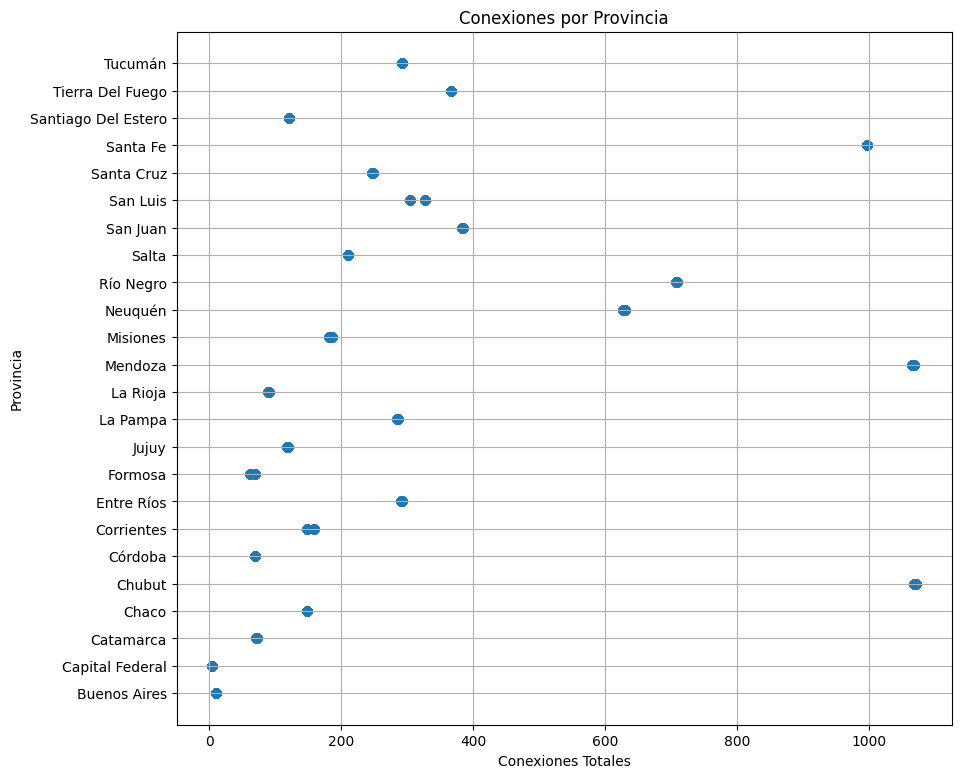

In [22]:
plt.figure(figsize=(10,9))
plt.scatter(data=df_analisis2, x='Total', y='Provincia')
plt.title('Conexiones por Provincia',loc='center')
plt.xlabel('Conexiones Totales')
plt.ylabel('Provincia')
plt.grid()
plt.show()

Guardando dataframe generado para Reporte de Visualizacion

In [21]:
df_analisis2.to_csv('..\\datasets\\dataset_vis\\vis_' + guid + '.csv',index=False)